In [2]:
#Decision Tree
 
#Assignment

#About the data: 
#Let’s consider a Company dataset with around 10 variables and 400 records. 
#The attributes are as follows: 
# Sales -- Unit sales (in thousands) at each location
# Competitor Price -- Price charged by competitor at each location
# Income -- Community income level (in thousands of dollars)
# Advertising -- Local advertising budget for company at each location (in thousands of dollars)
# Population -- Population size in region (in thousands)
# Price -- Price company charges for car seats at each site
# Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
# Age -- Average age of the local population
# Education -- Education level at each location
# Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
# US -- A factor with levels No and Yes to indicate whether the store is in the US or not
#The company dataset looks like this: 
 
#Problem Statement:
#A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
#Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
## Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier #importing decision tree classifier
from sklearn.model_selection import train_test_split #importing train_test_split function
from sklearn.metrics import accuracy_score#importing metrics for accuracy calculation (confusion matrix)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn import datasets  
from sklearn import preprocessing

In [ ]:
company=pd.read_csv("/content/Company_Data.csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
company['Sales_Efficiency'] = company.Sales.map(lambda x: 'High' if x>8 else 'Low')

In [ ]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Efficiency
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Low


In [ ]:
df= pd.get_dummies(company,columns=['ShelveLoc','Urban','US'])

In [ ]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Sales_Efficiency,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,High,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,High,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,High,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,Low,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,Low,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,High,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,Low,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,Low,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,Low,1,0,0,0,1,0,1


In [ ]:
feature_cols=['CompPrice','Income','Advertising','Population','Price','Education','ShelveLoc_Bad','ShelveLoc_Good','ShelveLoc_Medium','Urban_No','Urban_Yes','US_No','US_Yes']

In [ ]:
X = df[feature_cols]
Y = df['Sales_Efficiency']

In [ ]:
X

,CompPrice,Income,Advertising,Population,Price,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,17,1,0,0,0,1,0,1
1,111,48,16,260,83,10,0,1,0,0,1,0,1
2,113,35,10,269,80,12,0,0,1,0,1,0,1
3,117,100,4,466,97,14,0,0,1,0,1,0,1
4,141,64,3,340,128,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,14,0,1,0,0,1,0,1
396,139,23,3,37,120,11,0,0,1,1,0,0,1
397,162,26,12,368,159,18,0,0,1,0,1,0,1
398,100,79,7,284,95,12,1,0,0,0,1,0,1


In [ ]:
Y

0      High
1      High
2      High
3       Low
4       Low
       ... 
395    High
396     Low
397     Low
398     Low
399    High
Name: Sales_Efficiency, Length: 400, dtype: object

In [ ]:
Y.value_counts()

Low     236
High    164
Name: Sales_Efficiency, dtype: int64

In [ ]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.2,random_state=0)

In [ ]:
X_train

,CompPrice,Income,Advertising,Population,Price,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
336,138,35,6,60,143,18,1,0,0,0,1,1,0
64,100,67,12,184,104,16,0,0,1,1,0,0,1
55,143,81,5,60,154,18,0,0,1,0,1,0,1
106,102,33,0,217,139,18,0,0,1,1,0,1,0
300,116,78,1,158,99,11,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,107,105,18,428,103,12,0,0,1,0,1,0,1
192,108,26,0,408,93,14,0,0,1,1,0,1,0
117,145,53,0,507,119,12,0,0,1,0,1,1,0
47,126,98,0,173,108,16,1,0,0,0,1,1,0


In [ ]:
X_test

,CompPrice,Income,Advertising,Population,Price,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
132,125,87,9,232,136,10,0,1,0,0,1,0,1
309,131,111,13,33,80,18,1,0,0,0,1,0,1
341,98,120,0,268,93,10,0,0,1,1,0,1,0
196,130,28,6,410,133,16,1,0,0,0,1,0,1
246,120,56,20,266,90,18,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,107,117,11,148,118,18,0,1,0,0,1,0,1
363,111,75,1,377,108,12,0,1,0,0,1,1,0
304,123,98,12,408,134,10,0,1,0,0,1,0,1
361,131,25,10,183,104,15,0,0,1,1,0,0,1


In [ ]:
Y_train

336     Low
64      Low
55      Low
106     Low
300    High
       ... 
323    High
192     Low
117    High
47      Low
172    High
Name: Sales_Efficiency, Length: 320, dtype: object

In [ ]:
Y_test

132    High
309    High
341     Low
196     Low
246     Low
       ... 
14     High
363    High
304    High
361    High
329    High
Name: Sales_Efficiency, Length: 80, dtype: object

In [ ]:
Y_test.value_counts()

Low     43
High    37
Name: Sales_Efficiency, dtype: int64

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

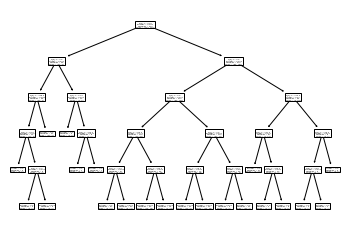

In [ ]:
#PLot the decision tree
tree.plot_tree(model);

In [ ]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

Low     44
High    36
dtype: int64

In [ ]:
pd.crosstab(Y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,High,Low
Sales_Efficiency,,
High,26,11
Low,10,33


In [ ]:
# Accuracy 
np.mean(preds==Y_test)

0.7375

In [ ]:
model.score(X_train,Y_train)

0.85625

In [ ]:
print("Accuracy", accuracy_score(Y_test,preds)*100) 

Accuracy 73.75


# Building Decision Tree Classifier (CART) using Gini Criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=6)

In [ ]:
model_gini.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Prediction and computing the accuracy
pred=model.predict(X_test)
np.mean(preds==Y_test)

0.7375